# Feature Selection
---
In machine learning and statistics, feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for mainly four reasons:
- simplification of models to make them easier to interpret by researchers/users
- shorter training times
- to avoid the curse of dimensionality
- enhanced generalization by reducing overfitting (by reducing variance)

Features gathered from the observation of a phenomenon are not all equally
informative: some of them may be noisy, correlated or irrelevant. Feature
selection aims at selecting a feature set that is relevant for a given task. This
problem is complex and remains an important issue in many domains. 

Contents: 
- [Feature selection by the Boruta Algorithm](#boruta)
- [Feature selection by Random Forest](#random-forest)
- [Feature selection by PCA](#PCA)

In [10]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc 

# relevant feature selection libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from boruta import BorutaPy

from functions import functions

ModuleNotFoundError: No module named 'functions'

In [3]:
# Set global paths
ROOT_PATH = os.path.abspath(".").split("src")[0]

# configure matplotlib params and plotting
sns.set()
sns.set_context('paper')
sns.set_style('whitegrid', {'axes.grid': True, 'grid.linestyle': '--'})

rc('figure', figsize=(12,6))
rc('xtick', labelsize=12)
rc('ytick', labelsize=12)
rc('axes', labelsize=13, titlesize=14)
rc('legend', fontsize=14, handlelength=2)
rc('font', family='serif')

SEED=100
np.random.seed(SEED)

**Loading the data**

In [101]:
data_train = np.load(ROOT_PATH + "data/scaled/data_scaled_train.npy")
data_valid = np.load(ROOT_PATH + "data/scaled/data_scaled_valid.npy")
data_test = np.load(ROOT_PATH + "data/scaled/data_scaled_test.npy")

headers = pd.read_csv(ROOT_PATH+"data/metadata/tags_all_chosen.csv", 
                      sep=";", keep_default_na=False, header=None).values[:,0]
target_tags = pd.read_csv(ROOT_PATH+"data/metadata/tags_targets.csv", 
                          sep=";", keep_default_na=False, header=None).values[:,0]

x_train = data_train[:,len(target_tags):]
y_train = data_train[:,:len(target_tags)]

print(data_train.shape, x_train.shape, y_train.shape)

(53211, 117) (53211, 114) (53211, 3)


<a class="anchor" id="boruta"></a>

---
## (1) Feature Selection by the  Boruta Algorithm

Boruta is an all relevant feature selection method, while most other are minimal optimal; this means it tries to find all features carrying information usable for prediction, rather than finding a possibly compact subset of features on which some classifier has a minimal error. The Boruta algorithm is a Random Forest classification algorithm that we'll use to perform a top-down search for relevant features by comparing original attributes' importance with importance achievable at random, estimated using their permuted copies, and progressively eliminating irrelevant features.

---

In [90]:
def run_boruta(X, y, ntrees=500):
    forest = RandomForestRegressor(n_jobs=-1, max_depth=5, random_state=SEED)
    feat_selector = BorutaPy(forest, n_estimators=ntrees, verbose=2, random_state=SEED, max_iter=100)
    feat_selector.fit(X,y)
    
    return forest, feat_selector

We must run a separate run for each of our targets. Finally, all "confirmed" tags will be concatenated together and represent the chosen features. 

In [14]:
flow_forest, flow_boruta = run_boruta(x_train, y_train[:,0])

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	25
Tentative: 	23
Rejected: 	66


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	25
Tentative: 	23
Rejected: 	66


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	25
Tentative: 	23
Rejected: 	66


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	25
Tentative: 	23
Rejected: 	66


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	26
Tentative: 	15
Rejected: 	73


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	26
Tentative: 	15
Rejected: 	73


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	26
Tentative: 	15
Rejected: 	73


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	26
Tentative: 	15
Rejected: 	73


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	26
Tentative: 	15
Rejected: 	73


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	26
Tentative: 	14
Rejected: 	74


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	26
Tentative: 	14
Rejected: 	74


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	26
Tentative: 	14
Rejected: 	74


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	26
Tentative: 	14
Rejected: 	74


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	26
Tentative: 	13
Rejected: 	75


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	26
Tentative: 	13
Rejected: 	75


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	26
Tentative: 	13
Rejected: 	75


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	26
Tentative: 	13
Rejected: 	75


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	26
Tentative: 	13
Rejected: 	75


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	26
Tentative: 	13
Rejected: 	75


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	26
Tentative: 	13
Rejected: 	75


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	26
Tentative: 	13
Rejected: 	75


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	26
Tentative: 	13
Rejected: 	75


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	26
Tentative: 	13
Rejected: 	75


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	26
Tentative: 	13
Rejected: 	75


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	26
Tentative: 	12
Rejected: 	76


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	26
Tentative: 	12
Rejected: 	76


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	26
Tentative: 	12
Rejected: 	76


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	26
Tentative: 	11
Rejected: 	77


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	26
Tentative: 	11
Rejected: 	77


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	26
Tentative: 	11
Rejected: 	77


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	26
Tentative: 	11
Rejected: 	77


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	26
Tentative: 	11
Rejected: 	77


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	26
Tentative: 	10
Rejected: 	78


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79
Iteration: 	99 / 100
Confirmed: 	26
Tentative: 	9
Rejected: 	79


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	26
Tentative: 	6
Rejected: 	79


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


In [91]:
temp_forest, temp_boruta = run_boruta(x_train, y_train[:,1])

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	111
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	111


BorutaPy finished running.

Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	111


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


In [16]:
pres_forest, pres_boruta = run_boruta(x_train, y_train[:,2])

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	114
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	106


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	106


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	106


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	106


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	108


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	108


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	108


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	108


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109
Iteration: 	99 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	109


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	4
Tentative: 	0
Rejected: 	109


/home/shomeb/h/halvorre/master-thesis/venv/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


In [259]:
print("Confirmed for FT:",sum(flow_boruta.support_))
print("Confirmed for TT:",sum(temp_boruta.support_))
print("Confirmed for PT:",sum(pres_boruta.support_))

confirmed_ft = headers[3:][flow_boruta.support_]
confirmed_tt = headers[3:][temp_boruta.support_]
confirmed_pt = headers[3:][pres_boruta.support_]

def get_equal_elems(list1, list2):
    equal_elems = []
    for e1 in list1: 
        if e1 in list2: equal_elems.append(e1)
            
    return equal_elems

print("\n----- Confirmed tags for FT -----")
[print("{0}. {1}".format(i,tag)) for i,tag in enumerate(confirmed_ft)]
print("\nEqual tags to TT:", get_equal_elems(confirmed_ft, confirmed_tt))
print("Equal tags to PT:", get_equal_elems(confirmed_ft, confirmed_pt))
print()

print("----- Confirmed tags for TT -----")
[print("{0}. {1}".format(i,tag)) for i,tag in enumerate(confirmed_tt)]
print("\nEqual tags to FT:", get_equal_elems(confirmed_tt, confirmed_ft))
print("Equal tags to PT:", get_equal_elems(confirmed_tt, confirmed_pt))
print()

print("----- Confirmed tags for PT -----")
[print("{0}. {1}".format(i,tag)) for i,tag in enumerate(confirmed_pt)]
print("\nEqual tags to FT:", get_equal_elems(confirmed_pt, confirmed_ft))
print("Equal tags to TT:", get_equal_elems(confirmed_pt, confirmed_tt))
print()

Confirmed for FT: 26
Confirmed for TT: 3
Confirmed for PT: 4

----- Confirmed tags for FT -----
0. VAL_23-KA-9101-M01-62B:X.Value
1. VAL_23-KA-9101_APE:VALUE
2. VAL_23-KA-9101_APH:VALUE
3. VAL_23-KA-9101_APR:VALUE
4. VAL_23-KA-9101_ASP:VALUE
5. VAL_23-KA-9101_ESP:VALUE
6. VAL_23-PDI-96149:X.Value
7. VAL_23-PDI-96150:X.Value
8. VAL_23-PDT-96167:X.Value
9. VAL_23-PT-92504:X.Value
10. VAL_23-PT-92512:X.Value
11. VAL_23-PT-92521:X.Value
12. VAL_23-PT-92523:X.Value
13. VAL_23-PT-92532:X.Value
14. VAL_23-PT-92535:X.Value
15. VAL_23-PT-92540:X.Value
16. VAL_23_FIC_92543_01:Z.X.Value
17. VAL_23_FIC_92543_06:Z.X.Value
18. VAL_23_FT_92537_02:Z.X.Value
19. VAL_23_FT_92537_03:Z.X.Value
20. VAL_23_KA_9101_M01_62C:Z.X.Value
21. VAL_23_PIC_92538_04:Z.X.Value
22. VAL_23_PIC_92538_06:Z.X.Value
23. VAL_23_PIC_92538_12:Z.X.Value
24. VAL_23_PT_92531:Z.X.Value
25. VAL_23_ZT_92543:Z.X.Value

Equal tags to TT: []
Equal tags to PT: []

----- Confirmed tags for TT -----
0. VAL_23-TT-92537:X.Value
1. VAL_23-TT-

#### Export data with the selected features

In [321]:
confirmed_inputs = sorted(np.unique(np.concatenate((confirmed_ft, confirmed_tt, confirmed_pt))))
confirmed_inputs_idxs = [np.where(headers == tag)[0][0] for tag in confirmed_inputs]

tags_df = pd.DataFrame(np.hstack((np.expand_dims(confirmed_inputs, axis=1), 
                                  np.expand_dims(confirmed_inputs_idxs, axis=1))), 
                       columns=["Tag", "Index"])

# Save the tag names in metadata
path = ROOT_PATH + "data/metadata/feature_selection/"
tags_df.to_csv(path + "features_bor.csv", index=False)

# Export the datasets
all_selected_idxs = np.concatenate((range(3), confirmed_inputs_idxs))
selected_train = data_train[:, all_selected_idxs]
selected_valid = data_valid[:, all_selected_idxs]
selected_test = data_test[:, all_selected_idxs]
selected_complete = np.vstack((selected_train, selected_valid, selected_test))

path = ROOT_PATH + "data/feature_selection/boruta/"
print("Saving to file ...")
np.save(path + "train_bor.npy", selected_train)
np.save(path + "valid_bor.npy", selected_valid)
np.save(path + "test_bor.npy", selected_test)
np.save(path + "complete_bor.npy", selected_complete)
print("... success!")

Saving to file ...
... success!


### Boruta features with PCA analysis

Many of the features are highly correlated to each other, as shown by the below plot. It can therefore be useful to transform the data to decorrelated components by applying PCA. 

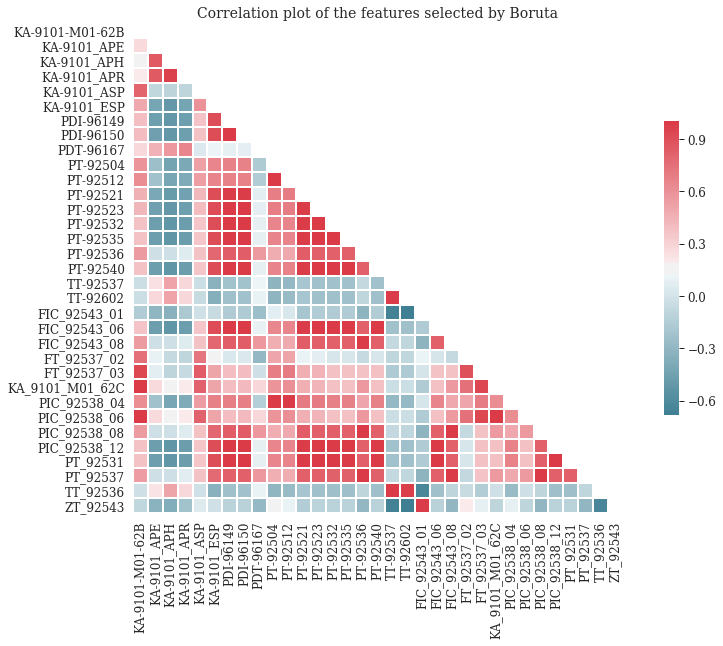

In [313]:
data_inputs = data_train[:,confirmed_inputs_idxs]

colnames = [name.split("VAL_23")[1][1:].split(":")[0] for name in confirmed_inputs]
df = pd.DataFrame(data_inputs, columns=colnames)
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=1, cbar_kws={"shrink": .6})

ax.set_title("Correlation plot of the features selected by Boruta")
f.show()

From the plot, we draw the following conclusions: 
- "PT"-tags have a high positive correlation with all other "PT"-tags
- "KA-9101_ASP" is highly correlated with \*_APR
- Most "PIC"-tags are highly correlated with the "PT"- and "FIC"-tags.
- "FIC"-tags are highly correlated to "PT"-tags.
- High negative correlation between "KA-9101_ESP" and "\*_APR" and "\*_ASP"
- Otherwise, it seems like the correlation is moderate .

Because of the generally high correlation, linear transformations that decorrelates the variables can be beneficial. Therefore, a PCA analysis is done on the data: 

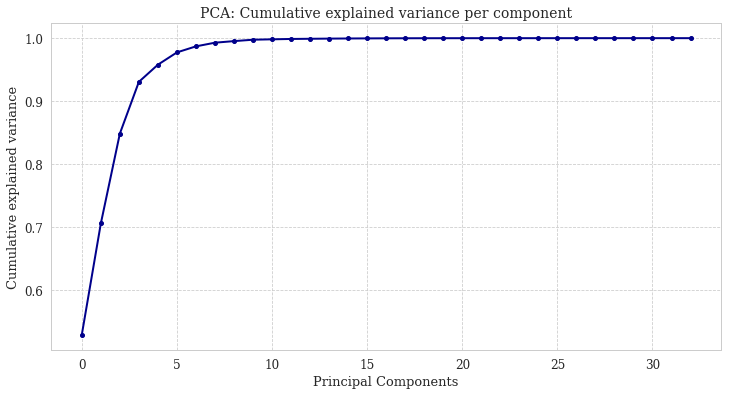

Number of components (99% var expl.): 8


In [314]:
pca = PCA().fit(data_inputs)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o", c="darkblue", ms=4, lw=2)
plt.title("PCA: Cumulative explained variance per component")
plt.xlabel("Principal Components")
plt.ylabel("Cumulative explained variance")
plt.show()

print("Number of components (99% var expl.):", PCA(.99).fit(data_train[:,all_confirmed_idxs[3:]]).n_components_)

Looks like 99% of the variation in the data can be described by only 8 principal components! 

**Exporting the PCA-datasets for training, validation and testing.**

In [315]:
def transform_pca(fit_pca, data, idxs_to_transform):
    transformed = fit_pca.transform(data[:,idxs_to_transform])
    data_pca = np.hstack((data[:,:3], transformed))  
    return data_pca

idxs = confirmed_inputs_idxs
pca = PCA(.99).fit(data_inputs)
print(pca.n_components_)

data_train_pca = transform_pca(pca, data_train, idxs)
data_valid_pca = transform_pca(pca, data_valid, idxs)
data_test_pca = transform_pca(pca, data_test, idxs)

print(data_train_pca.shape)
print(data_valid_pca.shape)
print(data_test_pca.shape)

print("Saving to file ...")
path = ROOT_PATH + "data/feature_selection/boruta/"
np.save(path + "train_bor_pca.npy", data_train_pca)
np.save(path + "valid_bor_pca.npy", data_valid_pca)
np.save(path + "test_bor_pca.npy", data_test_pca)
print("... success! ")

8
(53211, 11)
(17737, 11)
(17737, 11)
Saving to file ...
... success! 


---
## (2) Feature Selection by Random Forest

A second way to perform feature selection is to train a Random Forest which gives us "feature importances" for each of the features. The feature importance is decided from how often the variable has been used as a split criterion. Feature selection is done by choosing the X most important features based on the Random Forest. 

---

In [168]:
params_rf = {'n_estimators': 2000, 
             'max_depth': 5, 
             'min_samples_split': 2, 
             'max_features': 'auto', 
             'criterion': 'mse', 
             'random_state': 0, 
             'n_jobs': -1, 
             'oob_score': True,
             'verbose': 1
            }

rf = RandomForestRegressor(**params_rf)

In [169]:
rf.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  9.1min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=True, random_state=0, verbose=1, warm_start=False)

In [273]:
avg_imp = np.average(rf.feature_importances_)
avg_imp_gt0 = np.average(rf.feature_importances_[rf.feature_importances_ > 0])
print("Average Imp.:            ", avg_imp)
print("Average Imp. > 0:        ", avg_imp_gt0)
print("# of Feature Imp. > 0:   ",len(rf.feature_importances_[rf.feature_importances_ > 0]))
print("# of Feature Imp. > avg: ",len(rf.feature_importances_[rf.feature_importances_ > avg_imp]))

Average Imp.:             0.008771929824561412
Average Imp. > 0:         0.03703703703703707
# of Feature Imp. > 0:    27
# of Feature Imp. > avg:  4


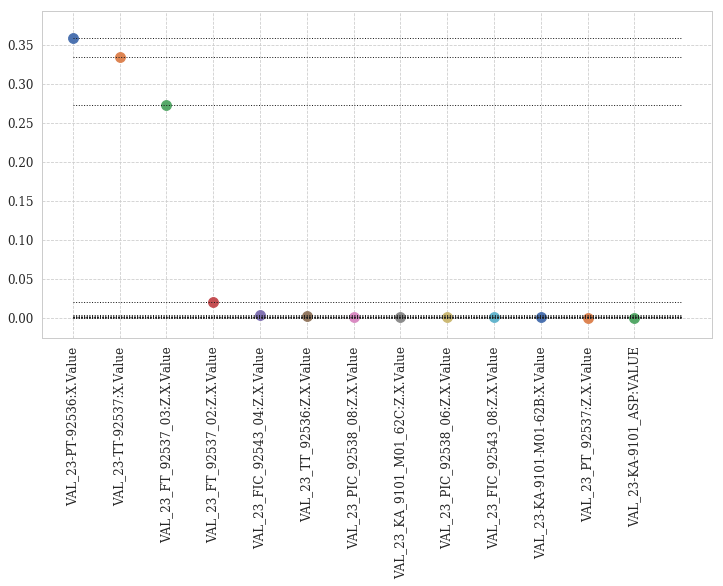

Most important features by Random Forest:


,Tag,Value
0,VAL_23-PT-92536:X.Value,0.358
1,VAL_23-TT-92537:X.Value,0.335
2,VAL_23_FT_92537_03:Z.X.Value,0.273
3,VAL_23_FT_92537_02:Z.X.Value,0.021
4,VAL_23_FIC_92543_04:Z.X.Value,0.004
5,VAL_23_TT_92536:Z.X.Value,0.002
6,VAL_23_PIC_92538_08:Z.X.Value,0.002
7,VAL_23_KA_9101_M01_62C:Z.X.Value,0.002
8,VAL_23_PIC_92538_06:Z.X.Value,0.001
9,VAL_23_FIC_92543_08:Z.X.Value,0.001


In [265]:
headers_imp = list(zip(headers[3:],rf.feature_importances_))
headers_imp_sorted = sorted(headers_imp, key=lambda tag: tag[1], reverse=True)
headers_imp_filtered = list(filter(lambda elem: elem[1] > 1e-4, headers_imp_sorted))

plt.figure()
for i in range(len(headers_imp_filtered)):
    tag, val = headers_imp_filtered[i]
    #plt.bar(x=i,height=val,label=tag)
    plt.scatter(x=i, y=val, label=tag, s=100)
    plt.hlines(y=val,xmin=0,xmax=len(headers_imp_filtered), linestyle="dotted", lw=1.0)

xticks = [tup[0] for tup in headers_imp_filtered]
plt.xticks(range(len(xticks)), xticks, rotation=90)
plt.show()

print("Most important features by Random Forest:")
rf_df = pd.DataFrame({"Tag":   [tup[0] for tup in headers_imp_filtered], 
              "Value": [round(tup[1],3) for tup in headers_imp_filtered]})
rf_df

In [ ]:
confirmed_inputs_rf = sorted(rf_df[""])

In [316]:
rf_confirmed_tags = sorted(rf_df["Tag"]).values
rf_confirmed_idxs = [np.where(headers==tag)[0][0] for tag in rf_confirmed_tags]
rf_confirmed_idxs_all = np.concatenate((range(len(target_tags)), rf_confirmed_idxs))

data = data_train[:,rf_confirmed_idxs]

colnames = [name.split("VAL_23")[1][1:].split(":")[0] for name in rf_confirmed_tags]
df = pd.DataFrame(data, columns=colnames)
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=1, cbar_kws={"shrink": .6})

ax.set_title("Correlation plot of the features selected by Random Forest")
f.show()

AttributeError: 'list' object has no attribute 'values'

#### Export results

In [267]:
rf_confirmed_tags = rf_df["Tag"].values
rf_confirmed_idxs = sorted([np.where(headers==tag)[0][0] for tag in rf_confirmed_tags])
rf_confirmed_idxs_all = np.concatenate(([0,1,2], rf_confirmed_idxs))

train_rf = data_train[:,rf_confirmed_idxs_all]
valid_rf = data_valid[:,rf_confirmed_idxs_all]
test_rf = data_test[:, rf_confirmed_idxs_all]

print(train_rf.shape)
print(valid_rf.shape)
print(test_rf.shape)

path = ROOT_PATH + "data/metadata/feature_selection/"
pd.Series(sorted(rf_confirmed_tags)).to_csv(path + "features_rf.csv", index=False)

path = ROOT_PATH + "data/feature_selection/"
print("Saving to file ...")
np.save(path + "train_rf.npy", train_rf)
np.save(path + "valid_rf.npy", valid_rf)
np.save(path + "test_rf.npy", test_rf)
print("... success!")

(53211, 16)
(17737, 16)
(17737, 16)
Saving to file ...
... success!


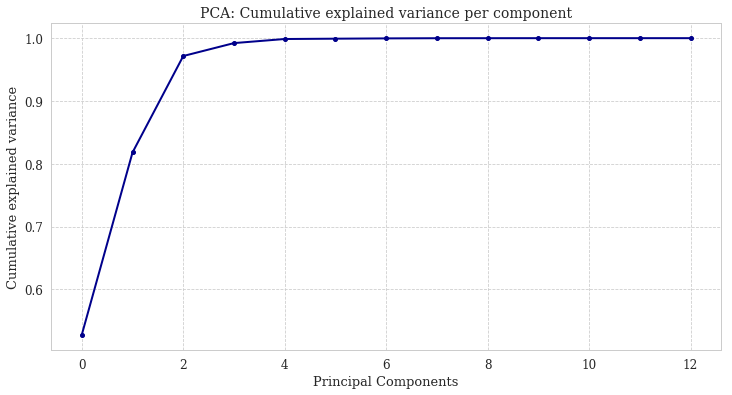

Number of components (99% var expl.): 4


In [268]:
pca = PCA().fit(data_train[:,rf_confirmed_idxs])

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o", c="darkblue", ms=4, lw=2)
plt.title("PCA: Cumulative explained variance per component")
plt.xlabel("Principal Components")
plt.ylabel("Cumulative explained variance")
plt.show()

print("Number of components (99% var expl.):", PCA(.99).fit(data_train[:,rf_confirmed_idxs]).n_components_)

In [270]:
idxs = rf_confirmed_idxs
pca = PCA(.99).fit(data_train[:,idxs])

rf_train_pca = transform_pca(pca, data_train, idxs)
rf_valid_pca = transform_pca(pca, data_valid, idxs)
rf_test_pca = transform_pca(pca, data_test, idxs)

print(rf_train_pca.shape)
print(rf_valid_pca.shape)
print(rf_test_pca.shape)

print("Saving to file ...")
path = ROOT_PATH + "data/feature_selection/rf/"
np.save(path + "train_rf_pca.npy", rf_train_pca)
np.save(path + "valid_rf_pca.npy", rf_valid_pca)
np.save(path + "test_rf_pca.npy", rf_test_pca)
print("... success! ")

(53211, 7)
(17737, 7)
(17737, 7)
Saving to file ...
... success! 
